In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import DataFrame
from patsy import dmatrices

In [30]:
df = pd.read_csv('data/train.csv')

In [31]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [33]:
df = df.drop(['Ticket','Cabin'],axis=1)

In [35]:
df = df.dropna()

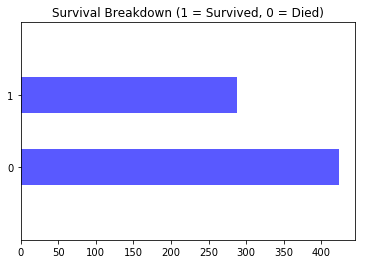

In [40]:
plt.figure(figsize=(6,4))
fig,ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh',color='blue',alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts()))
plt.title('Survival Breakdown (1 = Survived, 0 = Died)')

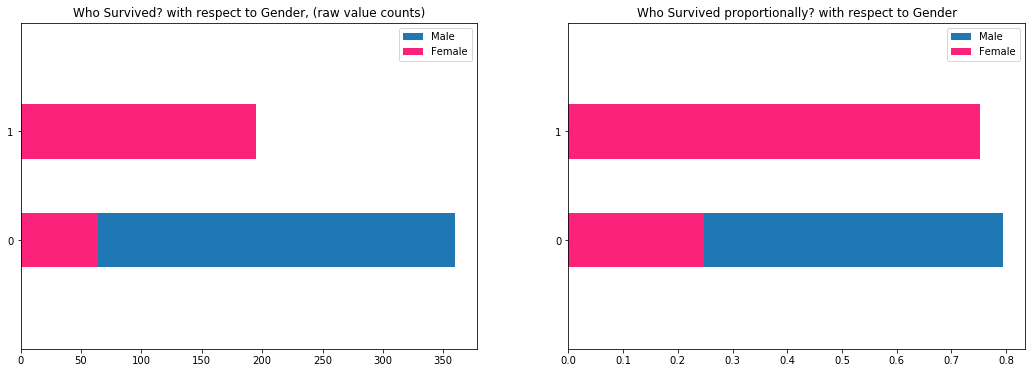

In [42]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
df.Survived[df.Sex == 'male'].value_counts(sort=False).plot(kind='barh',label='Male')
df.Survived[df.Sex == 'female'].value_counts(sort=False).plot(kind='barh',color='#FA2379',label='Female')
ax1.set_ylim(-1,2)
plt.title('Who Survived? with respect to Gender, (raw value counts)')
plt.legend(loc='best')

ax2 = fig.add_subplot(122)
(df.Survived[df.Sex == 'male'].value_counts(sort=False)/float(df.Sex[df.Sex == 'male'].size)).plot(kind='barh',label='Male')
(df.Survived[df.Sex == 'female'].value_counts(sort=False)/float(df.Sex[df.Sex == 'female'].size)).plot(kind='barh',color='#FA2379',label='Female')
ax2.set_ylim(-1,2)
plt.title('Who Survived proportionally? with respect to Gender')
plt.legend(loc='best')